<a href="https://colab.research.google.com/github/Vinnicios1Santos/Data_Science/blob/main/Projeto_Unicornio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOBRE O CONJUNTO DE DADOS**

"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão.

A base de dados encontra-se localizado no google drive, vindos da Kaggle.

In [108]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [109]:
# ler os dados
df = pd.read_csv('/content/drive/MyDrive/Data Science /Projetos/Projeto Unicornio/Startups+in+2021+end.csv')

# Verificar a dimensão
df.shape


(936, 8)

In [110]:
# Verificar os primeiros dados

df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [111]:
# Verificando os últimos registros

df.tail()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"
935,935,Pet Circle,$1,12/7/2021,Australia,Alexandria,E-commerce & direct-to-consumer,"Prysm Capital, Baillie Gifford & Co., TDM Grow..."


In [112]:
# Verificar todas as colunas existentes

df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [113]:
# Renomear as colunas
# Podemos utilizar também o .rename(), para poder realizar a alteração das tabelas.

df.columns = ['Id', 'Empresa', 'Valor ($)', 'Data de Adesão', 'Pais', 'Cidade', 'Setor', 'Investidores']

# Verificando a mudança
df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [114]:
# Verificando o tipo da informação

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [115]:
# Verificando os campos nulos

df.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

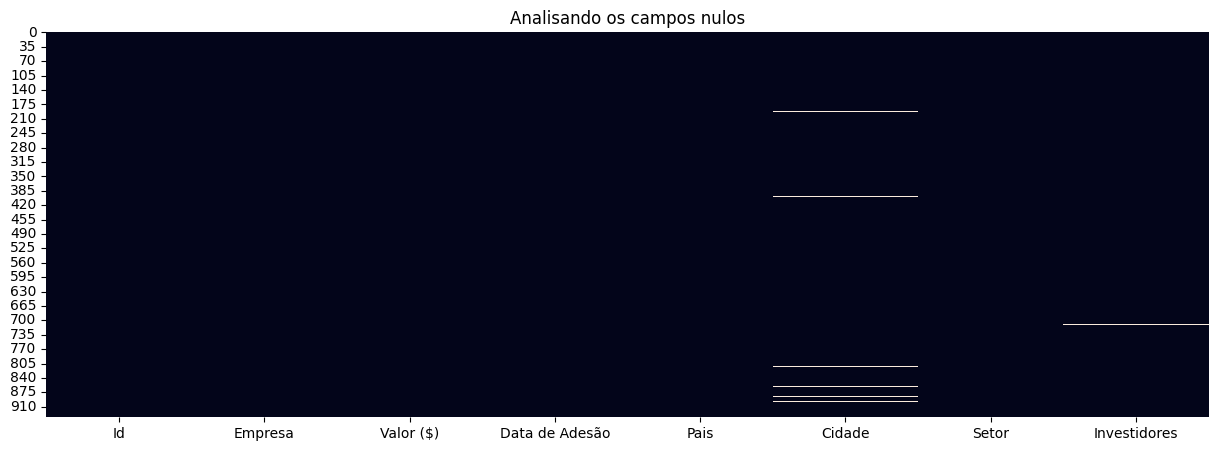

In [116]:
# Visualização gráfica
# Mudando o tamanho do visual
plt.figure(figsize = (15,5)) # Largura e tamanho respectivamente

# Adicionando o titulo
plt.title('Analisando os campos nulos')

# Plotando o gráfico ( Mapa de Calor )
sns.heatmap(df.isnull(), cbar = False); #cbar = False, retira a de escala

In [117]:
# Campos únicos
df.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [118]:
# Valor único dentro da coluna
df['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [119]:
# Verificar Unicos - Rank

# value_counts - pega os valores dentro da coluna e deixa com a ranqueado.

df['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [120]:
# Verificar Unicos - Rank

# value_counts - pega os valores dentro da coluna e deixa com a ranqueado.

df['Setor'].value_counts( normalize = True ) #normalize deixa os valores em percentu

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Fintech'),
  Text(1, 0, 'Internet software & services'),
  Text(2, 0, 'E-commerce & direct-to-consumer'),
  Text(3, 0, 'Artificial intelligence'),
  Text(4, 0, 'Health'),
  Text(5, 0, 'Supply chain, logistics, & delivery'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Mobile & telecommunications'),
  Text(9, 0, 'Data management & analytics'),
  Text(10, 0, 'Hardware'),
  Text(11, 0, 'Auto & transportation'),
  Text(12, 0, 'Edtech'),
  Text(13, 0, 'Consumer & retail'),
  Text(14, 0, 'Travel'),
  Text(15, 0, 'Artificial Intelligence'),
  Text(16, 0, 'Finttech')])

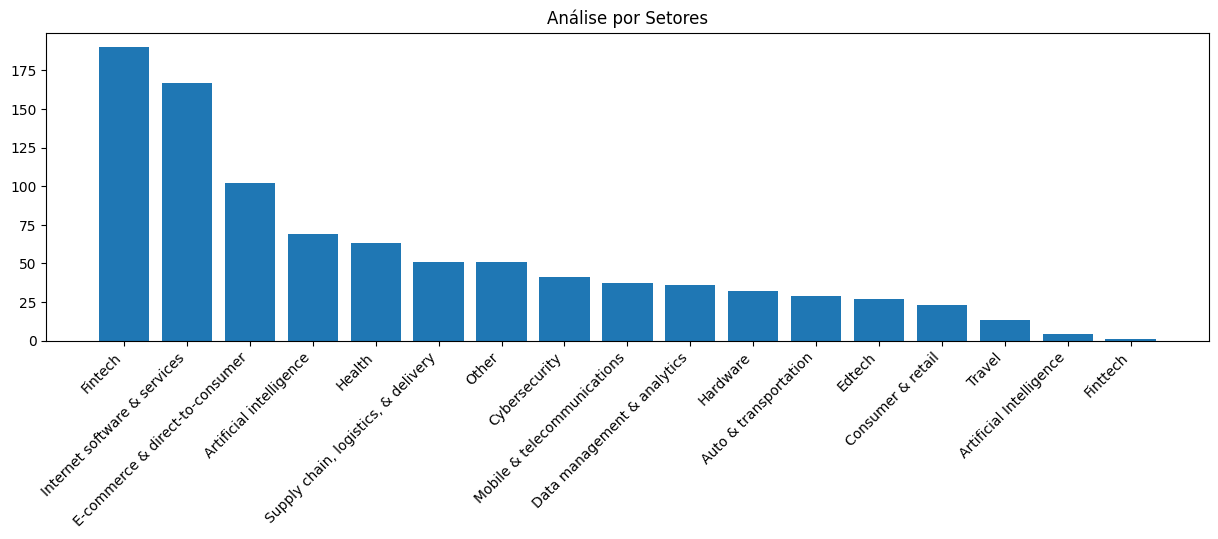

In [121]:
# Gráfico de barras

plt.figure(figsize = (15, 4))
plt.title('Análise por Setores')
plt.bar(df['Setor'].value_counts().index, df['Setor'].value_counts())
plt.xticks(rotation = 45, ha = 'right') # faz a rotação do index em 45 graus e para a direita.

In [122]:
# Agrupando por país
analise =  round(df['Pais'].value_counts( normalize = True) * 100, 1)
analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

([<matplotlib.patches.Wedge at 0x7c0ec52a09d0>,
 [Text(-1.0991433885816444, -0.043402895493968086, 'United States'),
  Text(0.6660732924303907, -0.8754121138703413, 'China'),
  Text(1.0825434309975575, -0.1951914957267261, 'India'),
  Text(1.0922985061465322, 0.1299383448796171, 'United Kingdom'),
  Text(1.0428953507189969, 0.34981321794452047, 'Germany'),
  Text(0.9797124202078213, 0.500163546942931, 'Israel'),
  Text(0.9049782800978222, 0.6253113724786938, 'France'),
  Text(0.8282149760002079, 0.7239198529733628, 'Canada'),
  Text(0.7509735353342952, 0.8037653570710237, 'Brazil'),
  Text(0.6770750743715555, 0.8669309912932822, 'South Korea'),
  Text(0.609501382331964, 0.9157008599621522, 'Singapore'),
  Text(0.55350481524947, 0.9505958234158459, 'Hong Kong'),
  Text(0.5140314746366867, 0.9725079141492029, 'Japan'),
  Text(0.47682445237587184, 0.9912812121776797, 'Australia'),
  Text(0.44211545123656837, 1.0072407496611153, 'Mexico'),
  Text(0.4100979637161354, 1.0206956746042766, 'Ne

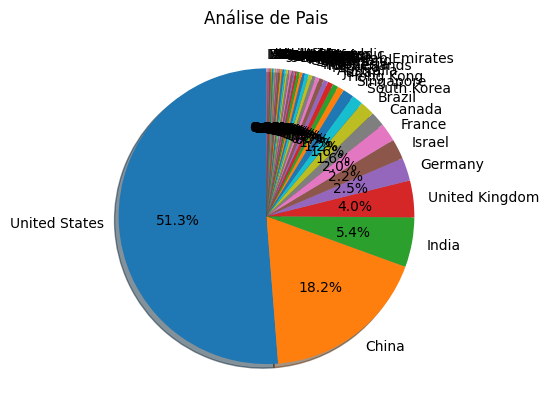

In [123]:
#  Gráfico de pizza - plot geral dos paises

#autopct mostra um rótulo de dados dentro do gráfico
plt.figsize = (20,8)
plt.title('Análise de Pais')
plt.pie(analise, labels = analise.index, shadow = True, startangle =90, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x7c0ec51d6080>,
 [Text(-1.0741107627903081, -0.23724685299919726, 'United States'),
  Text(0.9646056015522145, -0.5287116732720119, 'China'),
  Text(1.0432646673003358, 0.3487102435586306, 'India'),
  Text(0.8742513955029906, 0.6675960586021114, 'United Kingdom'),
  Text(0.7008094999551656, 0.8478596846015211, 'Germany'),
  Text(0.5522250138684521, 0.9513398625401902, 'Israel'),
  Text(0.40665745655400115, 1.0220712856885428, 'France'),
  Text(0.27475384194568403, 1.065133947602876, 'Canada'),
  Text(0.1537690775701822, 1.0891992796468493, 'Brazil'),
  Text(0.046268432361172895, 1.099026492932195, 'South Korea')],
 [Text(-0.5858785978856226, -0.1294073743631985, '56.9%'),
  Text(0.5261485099375715, -0.28838818542109734, '20.2%'),
  Text(0.5690534548910923, 0.1902055873956167, '6.0%'),
  Text(0.4768643975470857, 0.36414330469206074, '4.5%'),
  Text(0.3822597272482721, 0.4624689188735569, '2.8%'),
  Text(0.3012136439282466, 0.5189126522946491, '2.5%'),
  T

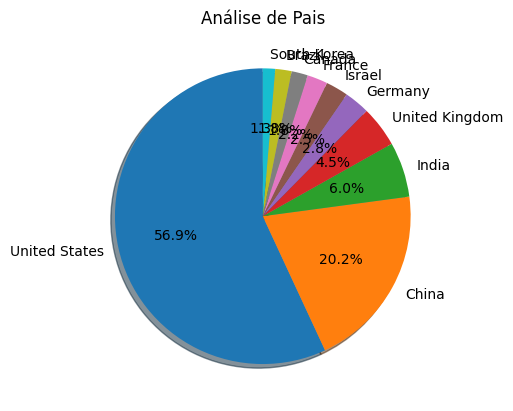

In [124]:
plt.figsize = (20,8)
plt.title('Análise de Pais')
plt.pie(analise.head(10), labels = analise.index[0:10], shadow = True, startangle =90, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x7c0ec5265f00>,
 [Text(-1.0741107627903081, -0.23724685299919726, 'United States'),
  Text(0.9646056015522145, -0.5287116732720119, 'China'),
  Text(1.0432646673003358, 0.3487102435586306, 'India'),
  Text(0.8742513955029906, 0.6675960586021114, 'United Kingdom'),
  Text(0.7008094999551656, 0.8478596846015211, 'Germany'),
  Text(0.5522250138684521, 0.9513398625401902, 'Israel'),
  Text(0.40665745655400115, 1.0220712856885428, 'France'),
  Text(0.27475384194568403, 1.065133947602876, 'Canada'),
  Text(0.1537690775701822, 1.0891992796468493, 'Brazil'),
  Text(0.046268432361172895, 1.099026492932195, 'South Korea')],
 [Text(-0.5858785978856226, -0.1294073743631985, '56.9%'),
  Text(0.5261485099375715, -0.28838818542109734, '20.2%'),
  Text(0.5690534548910923, 0.1902055873956167, '6.0%'),
  Text(0.4768643975470857, 0.36414330469206074, '4.5%'),
  Text(0.3822597272482721, 0.4624689188735569, '2.8%'),
  Text(0.3012136439282466, 0.5189126522946491, '2.5%'),
  T

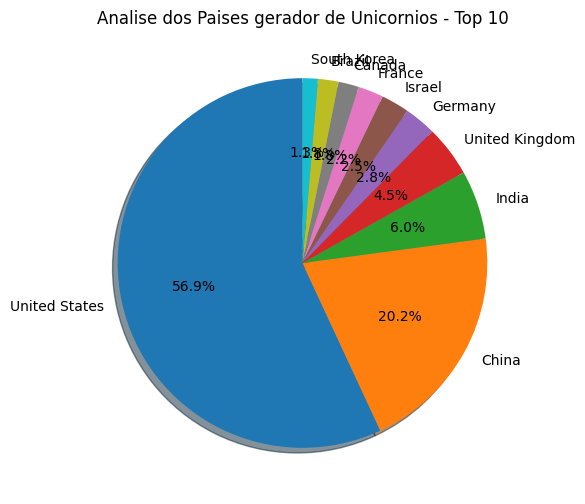

In [125]:
plt.figure(figsize = (15,6))
plt.title('Analise dos Paises gerador de Unicornios - Top 10')
plt.pie(
    analise.head(10), #10 primeiros registros
    labels = analise.index[0:10],
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%')

In [126]:
# Conversão para Data
df['Data de Adesão'] = pd.to_datetime( df['Data de Adesão'])
df['Data de Adesão']

0     2017-04-07
1     2012-12-01
2     2014-01-23
3     2011-12-12
4     2018-01-08
         ...    
931   2021-12-06
932   2021-12-07
933   2021-12-01
934   2021-12-01
935   2021-12-07
Name: Data de Adesão, Length: 936, dtype: datetime64[ns]

In [127]:
# Extrair ano e mês da coluna Data de Adesão, criamos uma coluna ano e mês

df['Mes'] = pd.DatetimeIndex(df['Data de Adesão']).month
df['Ano'] = pd.DatetimeIndex(df['Data de Adesão']).year

In [128]:
df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [129]:
# Tabela Analitica

#agrupando pais, ano e mes, e pegando apenas a coluna Id, contando e colocando index

#by = [seleciona as colunas que eu vou querer agrupar]
agrupado = df.groupby(by = ['Pais', 'Ano', 'Mes', 'Empresa'])['Id'].count().reset_index()
agrupado

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [130]:
#Filtrando pela Brazil

agrupado.loc[
    agrupado['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [131]:
#transformando a coluna valor

#removendo o $, apply ele permite mexer dentro da coluna
#lambda percorre cada linha e vai substituindo com o replace
#pd.to_numeric(ele substitui o valor que era object para float)
df['Valor ($)'] = pd.to_numeric( df['Valor ($)'].apply( lambda linha: linha.replace('$', ''))) #procuramos na linha cada $ e substituimos com o replace


In [132]:
df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [151]:
#Tabela Analitica

analise_pais = df.groupby(['Pais']).sum()['Valor ($)'].reset_index()
analise_pais.sort_values('Valor ($)', ascending = False)

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


from matplotlib import pyplot as plt
_df_0['Valor ($)'].plot(kind='hist', bins=20, title='Valor ($)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Valor ($)'].plot(kind='line', figsize=(8, 4), title='Valor ($)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [152]:
analise_valor = analise_pais.sort_values('Valor ($)', ascending = False)
analise_valor.head(10)

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'China'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Israel'),
  Text(9, 0, 'Hong Kong'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Indonesia'),
  Text(13, 0, 'South Korea'),
  Text(14, 0, 'Mexico'),
  Text(15, 0, 'Singapore'),
  Text(16, 0, 'Netherlands'),
  Text(17, 0, 'Japan'),
  Text(18, 0, 'Turkey'),
  Text(19, 0, 'Belgium'),
  Text(20, 0, 'Colombia'),
  Text(21, 0, 'Ireland'),
  Text(22, 0, 'Spain'),
  Text(23, 0, 'Austria'),
  Text(24, 0, 'Switzerland'),
  Text(25, 0, 'Estonia'),
  Text(26, 0, 'Lithuania'),
  Text(27, 0, 

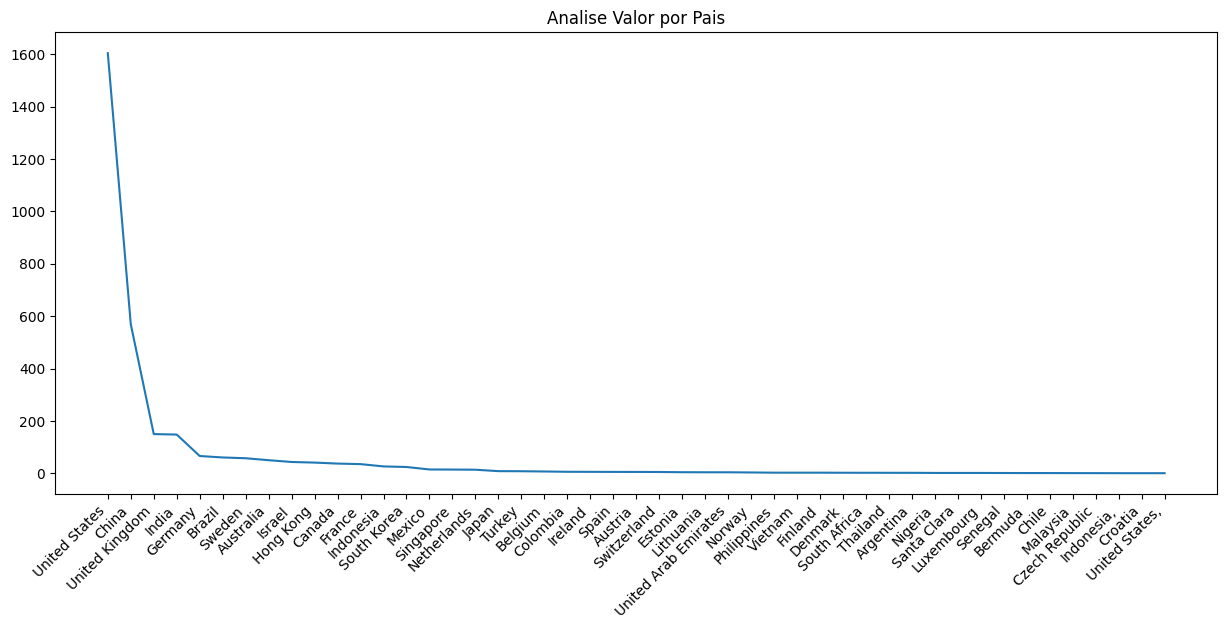

In [160]:
plt.figure(figsize = (15,6))
plt.title('Analise Valor por Pais')
plt.plot( analise_valor['Pais'], analise_valor['Valor ($)'])
plt.xticks(rotation = 45, ha = 'right')